In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [6]:
!pip install opencv-python

In [3]:
image = cv2.imread('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/1007788673_ced6bb5451_o.jpg',cv2.IMREAD_GRAYSCALE)

In [4]:
image.shape

(240, 300)

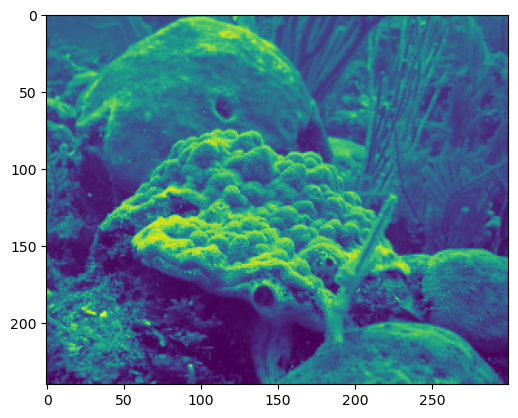

In [5]:
plt.imshow(image)

In [2]:
## import matplotlib.pyplot as plt
import glob
import librosa
import numpy as np
import cv2 
bleached_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/bleached_corals/*.jpg')
healthy_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/*.jpg')

data = []
labels = []

image_size=(32,32)

for i in bleached_corals:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)

for i in healthy_corals:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    


    
X=np.array(data)
y=np.array(labels)
y.shape

(922,)

In [3]:
X.shape

(922, 32, 32)

In [6]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/10
19/19 [==============================] - 1s 16ms/step - loss: 59.2058 - accuracy: 0.5263 - val_loss: 13.2003 - val_accuracy: 0.5878
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 12.8990 - accuracy: 0.5569 - val_loss: 8.0234 - val_accuracy: 0.6622
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 9.5974 - accuracy: 0.5891 - val_loss: 7.5795 - val_accuracy: 0.6216
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 8.9663 - accuracy: 0.5772 - val_loss: 7.4653 - val_accuracy: 0.6351
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 6.8229 - accuracy: 0.5959 - val_loss: 7.3971 - val_accuracy: 0.6216
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 8.1750 - accuracy: 0.6044 - val_loss: 5.8513 - val_accuracy: 0.6419
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 6.8456 - accuracy: 0.6044 - val_loss: 5.5766 - val_accuracy: 0.6419
Epoch 8/10
19/19

In [10]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/10
19/19 [==============================] - 1s 13ms/step - loss: 67.4911 - accuracy: 0.5365 - val_loss: 31.4592 - val_accuracy: 0.5811
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 23.4377 - accuracy: 0.5756 - val_loss: 26.9793 - val_accuracy: 0.5203
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 21.2364 - accuracy: 0.5620 - val_loss: 19.0948 - val_accuracy: 0.5338
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 17.4206 - accuracy: 0.5925 - val_loss: 15.6968 - val_accuracy: 0.5608
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 12.0101 - accuracy: 0.5722 - val_loss: 12.9170 - val_accuracy: 0.5270
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 9.7246 - accuracy: 0.5942 - val_loss: 10.4648 - val_accuracy: 0.5743
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 7.3907 - accuracy: 0.6197 - val_loss: 10.4713 - val_accuracy: 0.5743
Epoch 8

**Optimize the model to get at least 70% accuray .you may play with** 
1.   Dynamic learning rate
2.   Save model 
3.   Early stopping 
4.   Drop-Out** 
**for getting higher accuracy**


In [11]:
drops=0.3
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(drops),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/10
19/19 [==============================] - 1s 14ms/step - loss: 43.7183 - accuracy: 0.5212 - val_loss: 5.7616 - val_accuracy: 0.5270
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 2.2666 - accuracy: 0.5450 - val_loss: 0.7495 - val_accuracy: 0.5203
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.7506 - accuracy: 0.5348 - val_loss: 0.7207 - val_accuracy: 0.5203
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5416 - val_loss: 0.6842 - val_accuracy: 0.5068
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5399 - val_loss: 0.6858 - val_accuracy: 0.5068
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5501 - val_loss: 0.6853 - val_accuracy: 0.5203
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5399 - val_loss: 0.6864 - val_accuracy: 0.5068
Epoch 8/10
19/19 [

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:

for drops in np.arange(0.15,0.55,0.05):
    # Build the MLP model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(32,32)),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(drops),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Define the learning rate reduction callback
    lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',   # Monitor validation loss for learning rate reduction
        factor=0.05,            # Reduce learning rate by a factor of 0.05
        patience=5,            # Number of epochs with no improvement after which learning rate will be reduced
        min_lr=1e-6            # Minimum learning rate
    )
    # Define the model checkpoint callback to save the best model
    checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

    # Define the early stopping callback to stop training if validation loss does not improve
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6)


    # Train the model
    # Train the model
    model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Dropout:{drops:.2f}")
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")

    # Make predictions on new images
    predictions = model.predict(X_test[:10])
    predicted_classes = np.argmax(predictions, axis=1)

    # Print the predicted class and corresponding true class
    #for i in range(len(predicted_classes)):
        #print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")
        
    

Epoch 1/30
13/19 [===================>..........] - ETA: 0s - loss: 38.5186 - accuracy: 0.5433 

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x791211902cb0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 

KeyboardInterrupt



In [57]:

# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate reduction callback
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss for learning rate reduction
    factor=0.05,            # Reduce learning rate by a factor of 0.05
    patience=6,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)
# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6)


# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/30
19/19 [==============================] - 2s 19ms/step - loss: 48.4093 - accuracy: 0.4856 - val_loss: 5.4853 - val_accuracy: 0.5878
Epoch 2/30
19/19 [==============================] - 0s 8ms/step - loss: 16.1536 - accuracy: 0.5416 - val_loss: 8.7791 - val_accuracy: 0.5135
Epoch 3/30
19/19 [==============================] - 0s 7ms/step - loss: 7.8324 - accuracy: 0.5789 - val_loss: 2.7379 - val_accuracy: 0.5405
Epoch 4/30
19/19 [==============================] - 0s 8ms/step - loss: 4.8604 - accuracy: 0.5688 - val_loss: 2.0428 - val_accuracy: 0.5270
Epoch 5/30
19/19 [==============================] - 0s 8ms/step - loss: 2.5293 - accuracy: 0.5552 - val_loss: 1.1959 - val_accuracy: 0.5811
Epoch 6/30
19/19 [==============================] - 0s 8ms/step - loss: 1.3888 - accuracy: 0.5365 - val_loss: 0.8217 - val_accuracy: 0.4662
Epoch 7/30
19/19 [==============================] - 0s 8ms/step - loss: 0.7223 - accuracy: 0.4975 - val_loss: 0.7422 - val_accuracy: 0.4730
Epoch 8/30
19/19 

In [10]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate reduction callback
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss for learning rate reduction
    factor=0.05,            # Reduce learning rate by a factor of 0.05
    patience=6,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)



# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=30, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

'''
# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")
'''
print("BEST MODEL")
# Evaluate the bestcheckpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True) model
best_model = tf.keras.models.load_model('best_model.h5')
loss, accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/30
19/19 [==============================] - 1s 18ms/step - loss: 54.5154 - accuracy: 0.4771 - val_loss: 9.8538 - val_accuracy: 0.5405
Epoch 2/30
19/19 [==============================] - 0s 8ms/step - loss: 15.7035 - accuracy: 0.5891 - val_loss: 7.0921 - val_accuracy: 0.5541
Epoch 3/30
19/19 [==============================] - 0s 8ms/step - loss: 10.1809 - accuracy: 0.5246 - val_loss: 4.9535 - val_accuracy: 0.5541
Epoch 4/30
19/19 [==============================] - 0s 8ms/step - loss: 4.5691 - accuracy: 0.5450 - val_loss: 1.7916 - val_accuracy: 0.5473
Epoch 5/30
19/19 [==============================] - 0s 9ms/step - loss: 1.7065 - accuracy: 0.5161 - val_loss: 0.7088 - val_accuracy: 0.6149
Epoch 6/30
19/19 [==============================] - 0s 9ms/step - loss: 0.7910 - accuracy: 0.5365 - val_loss: 0.6702 - val_accuracy: 0.5405
Epoch 7/30
19/19 [==============================] - 0s 8ms/step - loss: 0.7013 - accuracy: 0.5365 - val_loss: 0.6862 - val_accuracy: 0.5203
Epoch 8/30
19/19

OSError: No file or directory found at best_model.h5